<a href="https://colab.research.google.com/github/dbarrau/TensorFlow_training/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow
### What we are going to cover

There are many definitions for a regression problem, but in our case, we will simplify it: predicting a numerical variable based on other combination of variables.

In this notebook we cover:

* Architecture of a neural network regression model
* Input shapes and output shape of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modelling:
  * Creating a model
  * compiling a model
  * fitting a model
  * Evaluating a model 
* Different evaluation methods
* Saving and loading models


One of the biggest things we will deal with is defining the **inputs**. Inputs represent our independent variables that have a correlation to the target or label. Often we will hear of them as predictors, or covariates. **Outputs** are also very relevant and we will be working mostly figuring out shapes.

A typical architecture for regression models is displayed below

Hyperparameter  | Typical value 
-------------------|------------------
#Input neuron       | one per input feature
# Hidden layers       | Depends on the problem, but typically 1 - 5
# Neurons per hidden layer       | Depends on the problem, but typically 10 - 100
# Hidden activation       | ReLu (or SeLu)
# Output activation      | None, or ReLU / Softplus (if positive outputs) or logistic/tanh (if bounded outputs)
# Loss function   | MSE or MAE/Huber (if outliers)
# Optimizer | SGD (Stochastic gradient descent), Adam


 **Source:** Adapted from page 293 of "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" by Aurélien Géron

In [ ]:
# Import tensorflow

import tensorflow as tf
print(tf.__version__)

2.8.2


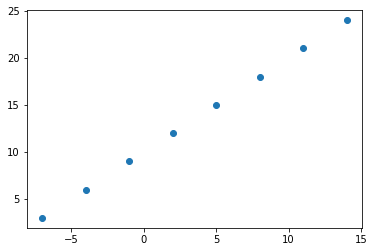

In [ ]:
### Create some data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
## Input and output shapes
X.shape

(8,)

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# declare input and output shapes

input_shape = X.shape
output_shape = y.shape

# print input and output shapes
input_shape,output_shape

((8,), (8,))

We want to use `X` to predict `y`. Our input shapes so far make little sense. **Why is this?**


In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Our input shapes and output have no shape! Tensors with 0 dimensions are scalars. We can use `ndim` to verify this

In [ ]:
X[0].ndim, y[0].ndim

(0, 0)

We are trying to model our relationship between X and y and we will now turn our numpy arrays into tensors

In [ ]:
# Turn our NumPy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

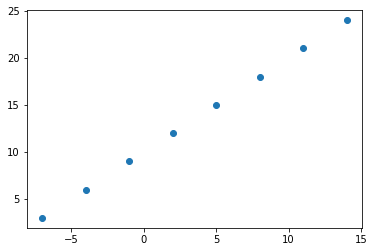

In [ ]:
plt.scatter(X,y);

## Steps in modelling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattenrs it is learning) and evaluation metrics (what can we use to interpret the performance of our model).

3. Fitting a model - letting hte model try to find patterns between X & y (features and labels).

In TensorFlow and Keras there are two main types for creating a model. The Sequencial API and the functional API:

```
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape = (i,)))
model.add(tf.keras.layers.Dense(1),input_shape = (i,))

```





Sequential models using the sequential API, or add the model into a list of layers:



```
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  ...
])
```



In [ ]:
# set random global seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ["mae"])  

# 3. fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


Even though it is a very simple model and inaccurate, we have a trained model and we will go through making predictions with our model.

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - We may add more layers, increase the number of hidden layers (all called neurons), or setting up callbacks, or changing the activation function of each layer.

2.  **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **fitting a model** - here we might fit a model for more **epochs** (leave it training longer) or on more data (give the model more examples to learn from).

In [ ]:
# We will rebuild our old model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)     
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model (This time we train for longer)
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 470ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

## We will now improve the model

Running a model from zero many times helps to better assimilate the programming.

```
# This is formatted as code
```



In [ ]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)          
]

)

# compile model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"]
              )

# fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 470ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4673 - 

In [ ]:
# Let's remind ourselves of the data again
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# We try to make a prediction
model.predict([17.0])

array([[26.583801]], dtype=float32)

>**Note to keep in mind -** The learning rate may be the most important parameter in most of the cases with neural networks.


> What we have changed so far to improve a model convergence, are called **hyperparameters**. 

* Number of hidden layers
* Number of neurons per layer
* Optimizer
  * Learning rate
  * Momentum (if optimizer allows it)
* Activation function
* Callbacks
* Weight initializers
* ...

## Evaluating a model


In practice, a typical workflow we'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> ... -> ... ...
```


> "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like 
* The training of a model - how do the predictions of a model line up against the ground truth (original labels)

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X = tf.cast(X, dtype=tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
# Make labels for the dataset

y = X + 10
y = tf.cast(y, dtype=tf.float32)
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

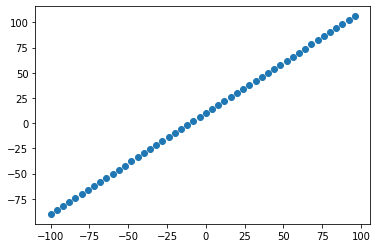

In [ ]:
# Visualize the data
plt.scatter(X,y);

### The 3 sets...

* **The training set -** the model learns from this data, which is typically 70 - 80% of the total data we have available.
* **Validation set -** the model gets tuned on this data.
* **Test set -** the model gets evaluated on this data to test what it has learned. This set is typically 10 - 15% of the total data available

In [ ]:
# Check the length of hoy many samples we have

len(X)

50

In [ ]:
# split the data into train and test sets

train_test_num = 0.8
train_test_split = int(train_test_num*len(X))

X_train = X[:train_test_split]
y_train = y[:train_test_split]

In [ ]:
X_test = X[train_test_split:]
y_test = y[train_test_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we've got our data in training and test sets, we visualize our data again! 

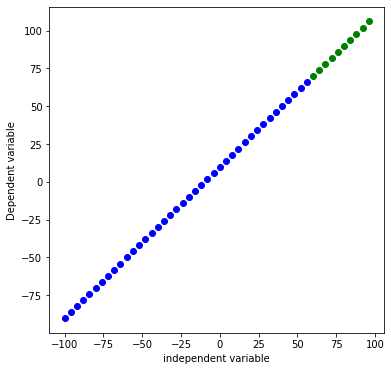

In [ ]:
plt.figure(figsize=(6,6));

# plot trianing data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data");

# plot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data");
plt.xlabel("independent variable");
plt.ylabel("Dependent variable");

In [ ]:
# Let's have a look at how to build a neural network for our data (yes, we do it again. We write it again, again and again is good)

# create the model
model_visualize = tf.keras.Sequential([
          tf.keras.layers.Dense(20, input_shape = [1], name="1st_layer", activation="relu"),
          tf.keras.layers.Dense(1, name="output_layer")
])

model_visualize.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"])



In [ ]:
model_visualize.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


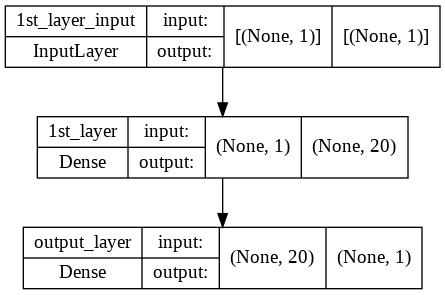

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_visualize, show_shapes=True)

* total params - total number of parameters in the models
* Trainable params - parameters that can be updated while training the model (weights and biases)
* Non-trainable params - these parameters aren't updated during training. This is typical when you bring in already learned parameters from another model as "frozen" data during **transfer learning**


> **Note -**"frozen data" colloquially means the parameters from the external model stay as it is. 

> **Resource -** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video https://www.youtube.com/watch?v=7sB052Pz0sQ&t=1s

> **Exercise -** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling ``model.summary()``

In [ ]:
# let's fit our model to the training data
model_visualize.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.2753 - mae: 27.2753
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 22.6884 - mae: 22.6884
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1834 - mae: 12.1834
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1024 - mae: 12.1024
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0899 - mae: 15.0899
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1947 - mae: 13.1947
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7270 - mae: 10.7270
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7887 - mae: 9.7887
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 5.4075 - mae: 5.4075
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 6.9611 - mae: 6.9611
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [ ]:
model.predict([60])

array([[68.40525]], dtype=float32)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we will see the model in form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model)

In [ ]:
y_pred = tf.constant(model.predict(X_test))
y_pred = tf.squeeze(y_pred)
y_pred,y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.40525 ,  72.29562 ,  76.18599 ,  80.076355,  83.96672 ,
         87.857086,  91.74745 ,  95.63783 ,  99.52819 , 103.418564],
       dtype=float32)>, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

> **Note -** If we feel like we will reuse some kind of functionality in the future, it is a good idea to turn it into a function

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(7,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data");
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data");
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions");
  # show the legend
  plt.legend();

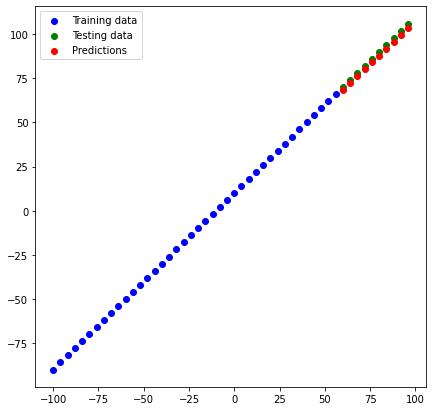

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluate our model's performance.

Since we are working on a regression model, two of the main metrics:
* MAE - mean absolute error, "the average of the magnitude from the error". Convenient as a starter for any regression problem.
* MSE - mean square error, "the average of the squared errors". Convenient when larger errors are more significant than smaller errors
* Huber - Combination of MSE and MAE

In [ ]:
# Calculate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 139ms/step - loss: 2.0881 - mae: 2.0881


[2.0880935192108154, 2.0880935192108154]

In [ ]:
# Calculate the MAE from the model

mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae.numpy()

2.0880935

In [ ]:
# Calculate the MSE from the model on test data

mse = tf.keras.losses.MSE(y_test,y_pred)
mse.numpy()

4.459294

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

Remember the way of the model:

```
build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

Top three ways to improve a model:
1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give the model more of a chance to find patterns in the data. 

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100. epochs.
2. `model_2` - 2 layers (10 and output), trained for 100 epochs.
3. `model_3` - 2 layers (10 and output), trained for 500 epochs.
4. `model_4` - 3 layers (20, 100 and output), trained for 100 epochs.
5. `model_5` - 3 layers (20, 100 and output), trained for 500 epochs.

#### Build `model_1`

A base model of 1 layer, 20 units,  



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model_1
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. train the model
model_1.fit(X_train,y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

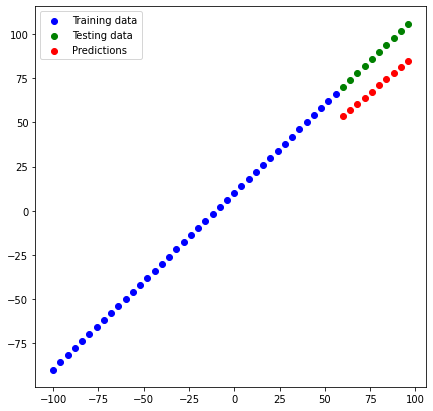

In [ ]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

#### Build `model_2`
* 2 dense layers, trained for 100 epochs 

In [ ]:
# set random seed
tf.random.set_seed(42)

# Train model_2
model_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(units=10, input_shape=[1]),
            tf.keras.layers.Dense(units=1)
          ])

# compile model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# fit model_2
model_2.fit(X_train,y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [========================

In [ ]:
# Calculate model_2 evaluation metrics
y_pred_2 = model_2.predict(X_test)
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

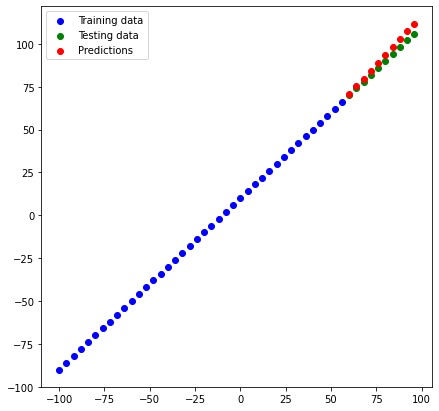

In [ ]:
# Plot model_2 results
plot_predictions(predictions=y_pred_2);

#### Build `model_3`
* 2 dense layers, trained for 500 epochs 

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create model 3

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=[1]),
                               tf.keras.layers.Dense(1)
                               ])

# compile model 3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit model 3
model_3.fit(X_train,y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 14ms

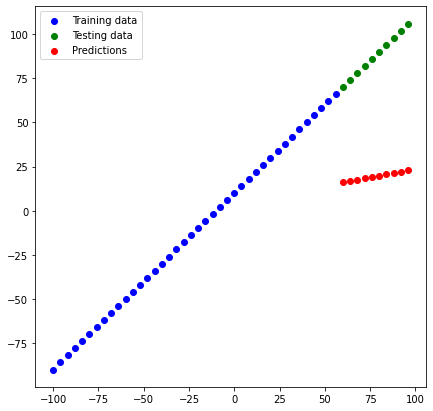

In [ ]:
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.60391>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4792.971>)

>**Note -** We want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

# Comparing the results of our experiments

We've run some experiments now and we will compare the results.


In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results,  columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.603912,4792.971191


It looks like model 2 performed the best.

In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note -** One of the main goals should be to minimize the time between experiments. The more experiments we do, the more things we will figure out which don't work. In turn, we get closer to figurning out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking our experiments

One really good habit in machine learning modelling is to track the results of our experiments. When doing so, it can be tedious to run lots of experiments.

Luckily there are tools to help us. 

**Resource -** AS we build more models, we'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll cover it later).
* Weights & Biases - a tool for tracking all kinds of machine learning experimets (plugs straight into TensorBoard)

# Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or a mobile app.

There are two main formats we can save our models:
* The SaveModel format (good for tensorflow environment)
* The HDF5 format (good for using it outside of TensorFlow environment)

In [ ]:
# Save model using SaveModel

model_2.save("model_2")

INFO:tensorflow:Assets written to: model_2/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("h5_model_2.h5")

In [ ]:
# Load in SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/model_2")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.predict(X_test) == loaded_SavedModel_format.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/h5_model_2.h5")

In [ ]:
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check predictions
model_2_h5_preds = loaded_h5_model.predict(X_test)
model_2_h5_preds == model_2.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there. (see second code cell below)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/h5_model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save file from Google Colab to Google Drive (it requires mouting Google Drive)

!cp /content/h5_model_2.h5 /content/drive/MyDrive


# Tackle a larger example


WE will use the Medical costs dataset

In [ ]:
# REad in the insurance dataset 

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

X = insurance_one_hot.drop(["charges"],axis=1)
y = insurance_one_hot["charges"]


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)



In [ ]:
tf.random.set_seed(42)

# 1. create model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

#### Right now our model is not performing well!. Let's improve it

To try improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for 200 epochs
3. (Insert experiment here)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Create insurance model 3

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

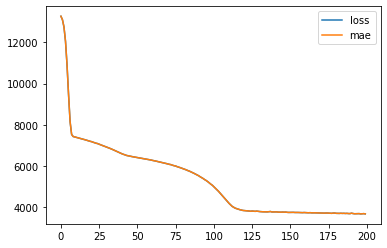

In [ ]:
# plot history (also known as a loss curve, or training curve)
pd.DataFrame(history.history).plot();


**Question -** How long should we train for? 

It depends... on the problem. However, many people have asked this. So TensorFlow has a solution called the EarlyStopping callback

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If we are not sure on which to use, we could try both and see which perform better. 

In [ ]:
# REad in the insurance dataframe 

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


TypeError: ignored

To prepare our data, we can borrow a frew classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Createa column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # turn column values to values between 0 and 1
)

# Create X and y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform column transformer to our training data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X_train_normal.shape, X_train.shape


((1070, 11), (1070, 6))

Super! Our data is normalized and one-hot encoded. Now let's build a neural network model to fit on our normalized data.

### Build, compile, fit, evaluate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create model_lg
model_lg = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_lg.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])

# 3. Fit the model
model_lg.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11925.96

In [ ]:
# Evaluate our insurance model trained on normalized data
model_lg.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]